In [2]:
# all the useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA

In [3]:
#importing the data into the notebook
data= pd.read_csv ('/Users/bathiyasenaratne/Desktop/Crop_recommendation.csv')
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
# collecting the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# seeing the number of nulls in the data and summing the 
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# giving the total of duplicated slots
data.duplicated().sum()

0

In [50]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
# to isolate the data into only numbers...
# more efficient way
#num_col= data.select_dtypes(include='number')
# less efficient way and will not drop the columns with NaN
#num_col= data.iloc[:, 0:7]
#num_col

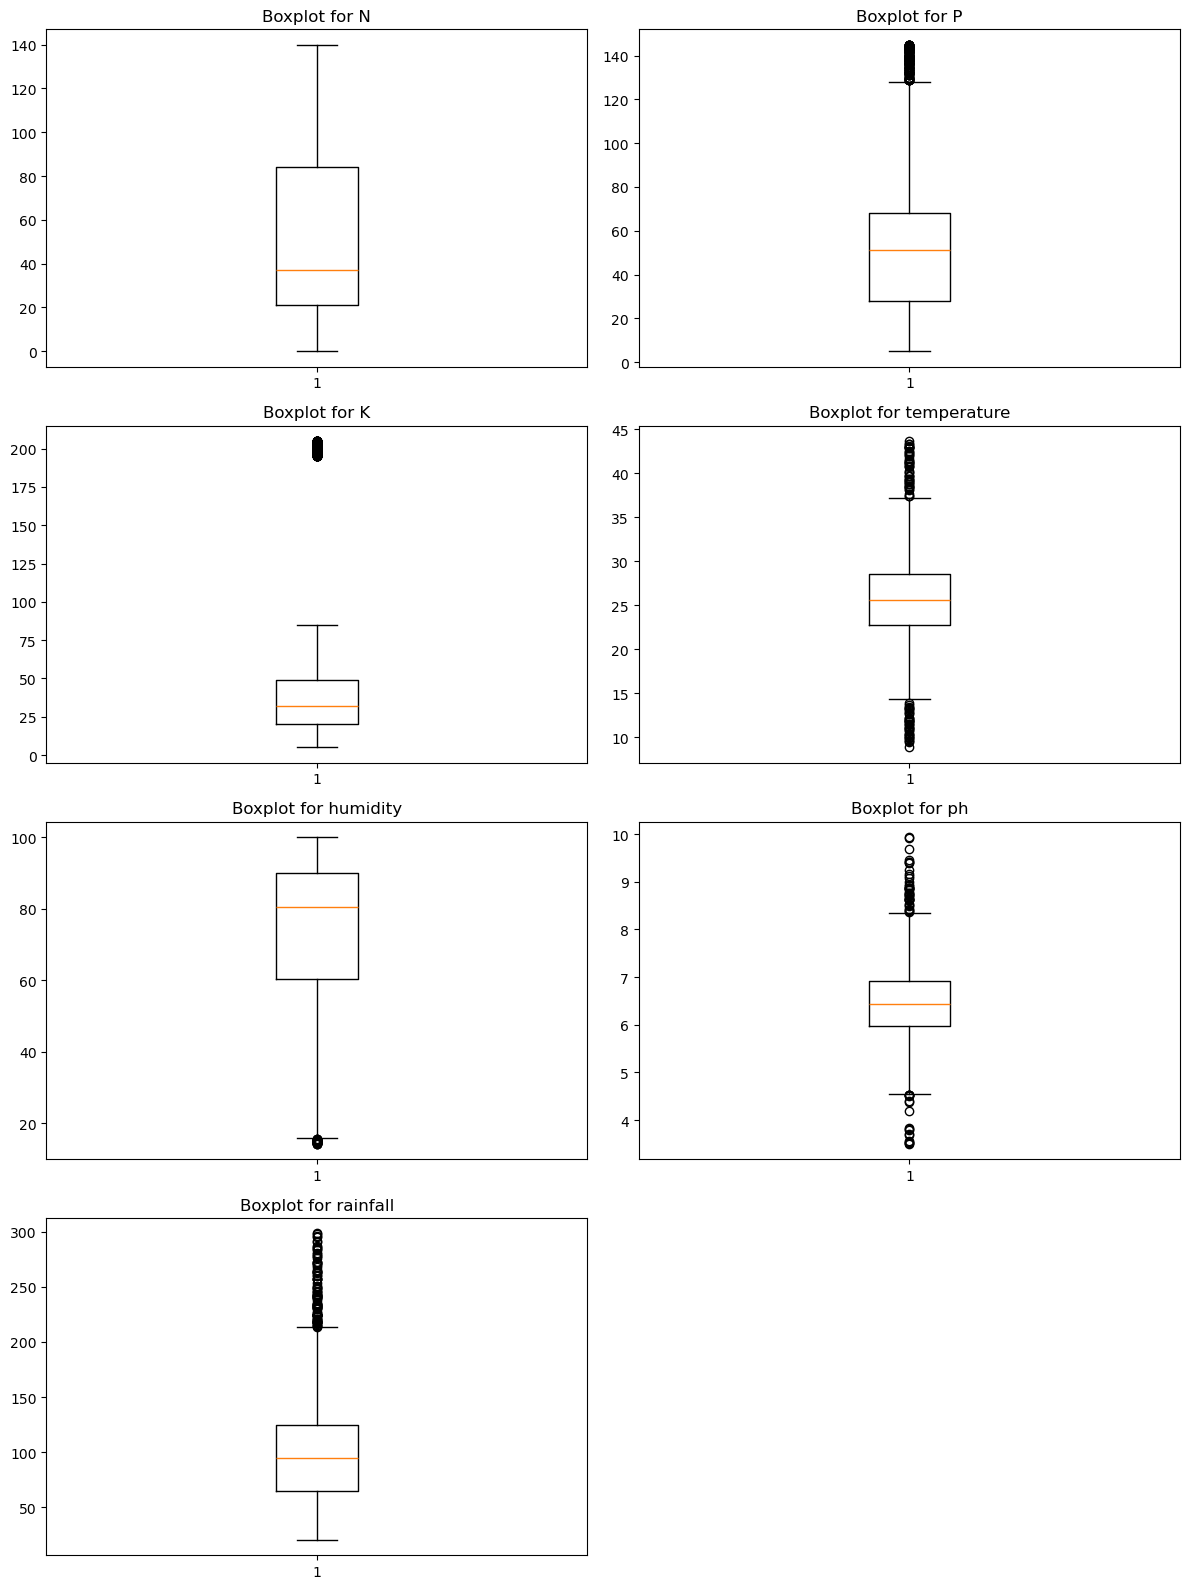

In [9]:
# to isolate the data into only numbers...
num_col= data.select_dtypes(include='number')
# getting the column indexs:
col= num_col.columns
# gettnig the lenght of data index:
n= len(col)
# Analysing the data box plot:
# this setups the plots for graphing, 4 -> columns, 2 -> rows, figsize is how big the graph is...
fig, axs = plt.subplots(4,2,figsize=(12,16))
# creating a 1D array... 
axs= axs.ravel()
# creating a for loop to graph each index, where the range is the number of indexs
for i in range(n):
# dropna used for dropping empty data...
# and the data[col[i]] -> takes the index say 0= N and then data[N] gives all table 
    axs[i].boxplot(data[col[i]].dropna())
# to set the title use -> set_title()
# to include the index use f-string -> f"____{}"
    axs[i].set_title(f"Boxplot for {col[i]}")
# the range(start, stop, step)... in this case it would be 7 and then dont include 8
for j in range(n, len(axs)):
# fig is from fig, axs, and delaxes() -> removes removes and updates the axes
    fig.delaxes(axs[j])
# for formatting the space around the plots use .tight_layout()
plt.tight_layout()
# displaces all open figures
plt.show()

Text(0.5, 1.0, 'All Numerical Data')

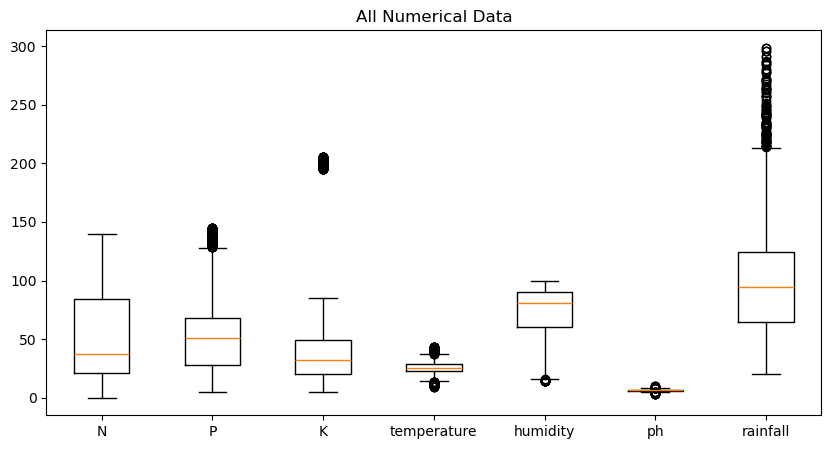

In [52]:
#making a boxplot with all 7 in one figure!
plt.figure(figsize=(10,5))
#drop() will drop specific columns ie) label one, tick_labels -> to name the columns
plt.boxplot(data.drop(columns="label"),tick_labels=data.drop(columns="label").columns)
# xticks -> rotates the ticks angle
plt.xticks(rotation=0)
plt.title("All Numerical Data")

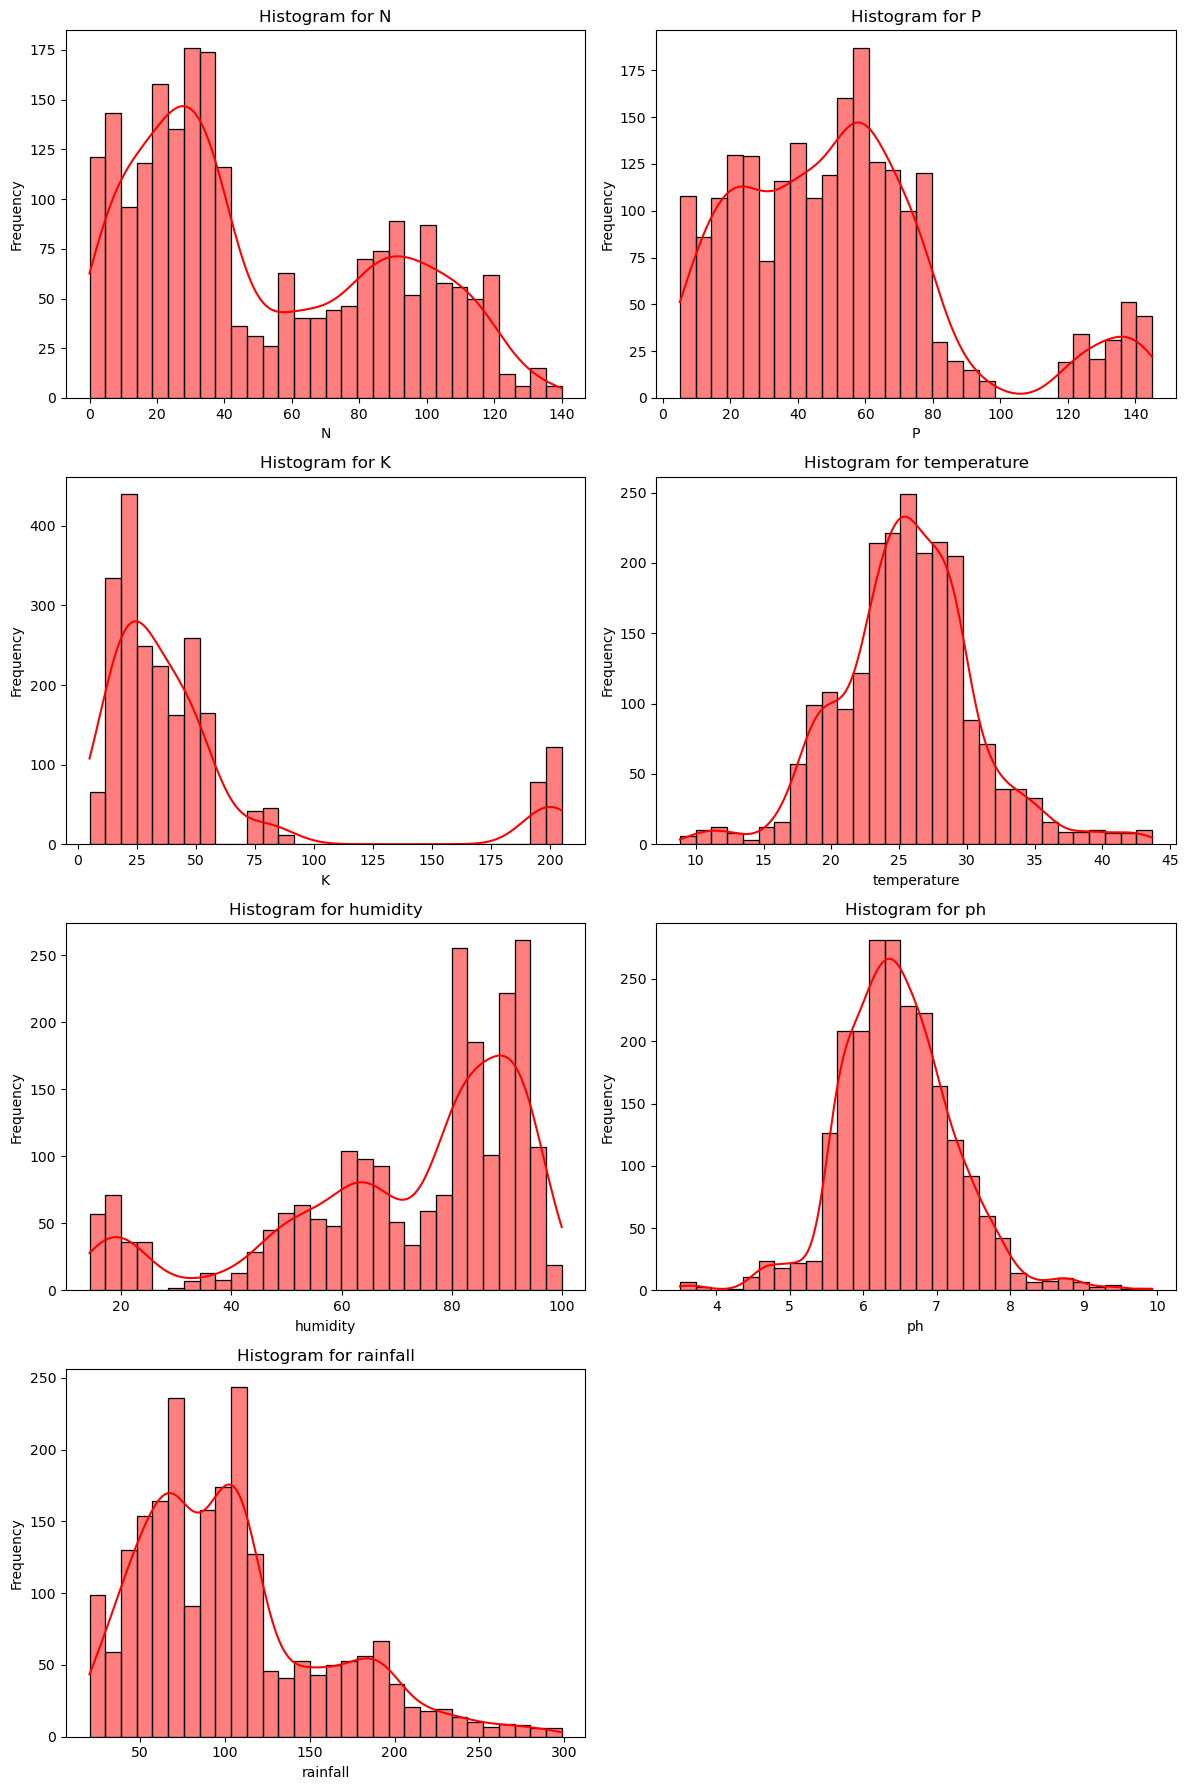

In [11]:
# making histograms -> frequency vs the dependent variable
# initalize the data, 7 images so, 4 rows with 2 columns
fig, axs= plt.subplots(4,2,figsize=(12,18))
# making the cols into a 1D array...
axs= axs.ravel()
# n is already initalized in the top which is n=len(cols) ... 7
for i in range(n):
# histplot gives a histogram, bins is how many bars will there be, and ax = axes, 
    sns.histplot(data[col[i]],bins=30,kde= True, ax= axs[i], color= "red")
    axs[i].set_title(f"Histogram for {col[i]}")
    axs[i].set_ylabel("Frequency")
for j in range (n,len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

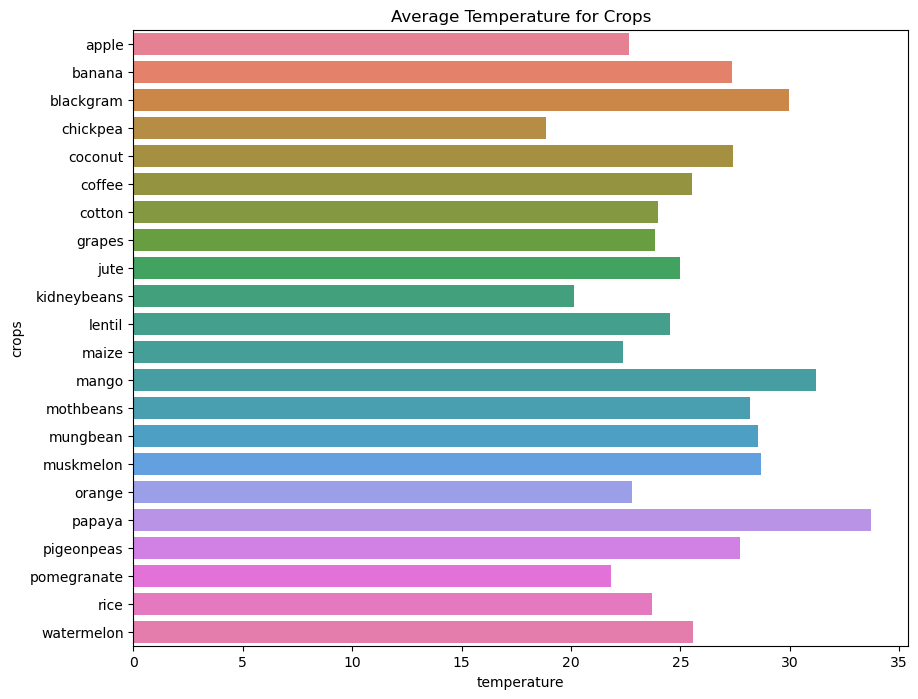

In [12]:
# Bar graph to compare the average temperature per label
# groupby() -> splitting the data into labels [temp] -> is what the average becomes
# reset_index() -> if Resets the index
grouped_label_data= data.groupby("label")["temperature"].mean().reset_index()
# for one plot... 
plt.figure(figsize=(10,8))
# sns.barplot() -> gives barplot
# x and y are the table indexs, ie) label and temperature
sns.barplot(y= "label", x= "temperature", hue= "label", legend= False, data= grouped_label_data, palette= "husl")
# initalizes the y-axis
plt.ylabel("crops")
# initalizes the x-axis
plt.xlabel("temperature")
# for multiple graphs... axs[i].set_title, for one graph, plt. title()
plt.title("Average Temperature for Crops")
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'apple'),
  Text(1, 0, 'banana'),
  Text(2, 0, 'blackgram'),
  Text(3, 0, 'chickpea'),
  Text(4, 0, 'coconut'),
  Text(5, 0, 'coffee'),
  Text(6, 0, 'cotton'),
  Text(7, 0, 'grapes'),
  Text(8, 0, 'jute'),
  Text(9, 0, 'kidneybeans'),
  Text(10, 0, 'lentil'),
  Text(11, 0, 'maize'),
  Text(12, 0, 'mango'),
  Text(13, 0, 'mothbeans'),
  Text(14, 0, 'mungbean'),
  Text(15, 0, 'muskmelon'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'pigeonpeas'),
  Text(19, 0, 'pomegranate'),
  Text(20, 0, 'rice'),
  Text(21, 0, 'watermelon')])

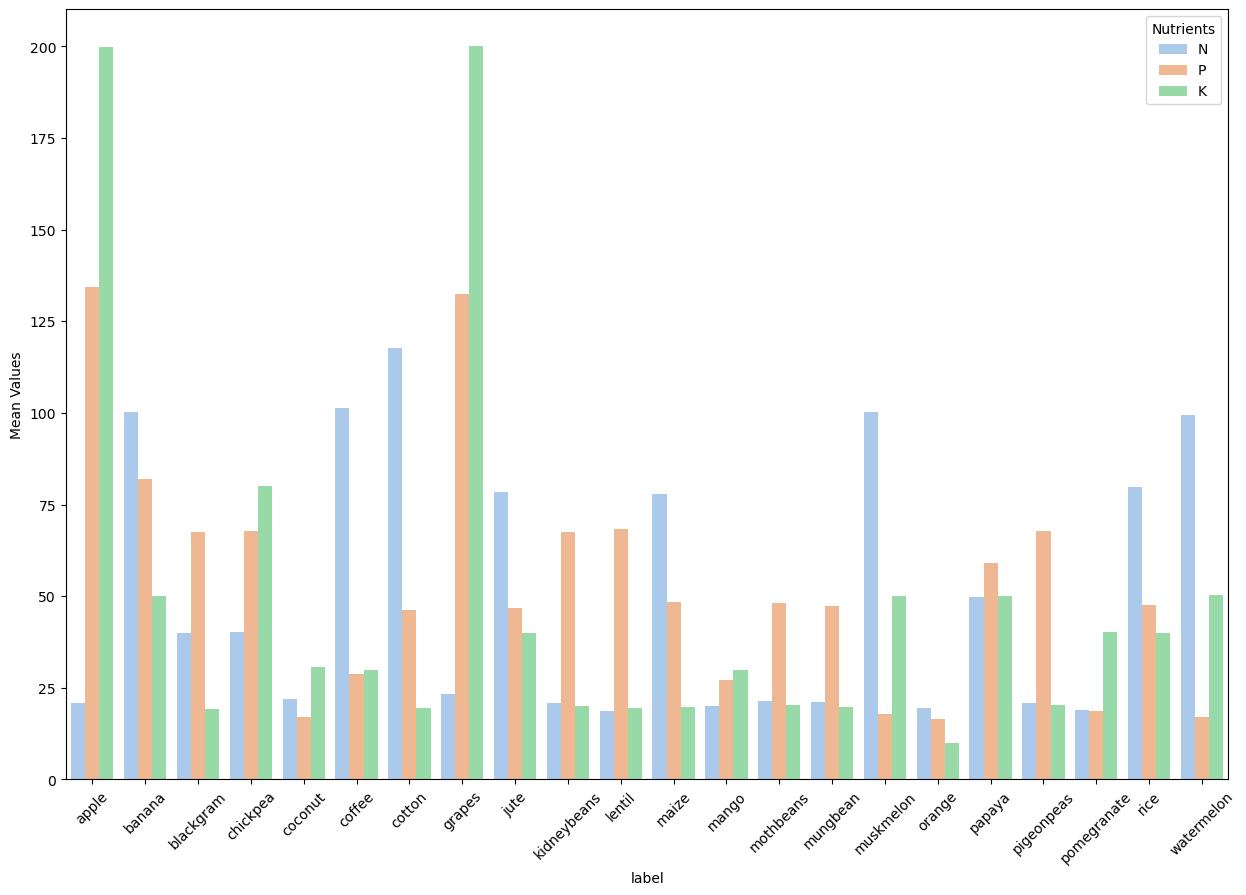

In [70]:
# Making a barplot for the Nitrogen, Phosphorus, Potassium by type of crop
# first it groups by label, then it groups by the N, P, K and calculates the mean
# reset_index() ->
group_npk= data.groupby("label")[["N","P","K"]].mean().reset_index()
# now you have a table with the labels and mean value of the other categories
# using met() which breaks it down into value and variable...
# id_vars -> identifiable variables
melted= group_npk.melt(id_vars= "label",value_vars= ["N","P","K"], var_name="Nutrients", value_name= "Mean Values")
#graphing time!
plt.figure(figsize=(15,10))
sns.barplot(x="label",y= "Mean Values", hue = "Nutrients", data= melted, palette= "pastel")
plt.xticks(rotation=45)